In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import env, prepare, explore, wrangle, evaluate
warnings.filterwarnings('ignore')

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


<AxesSubplot:>

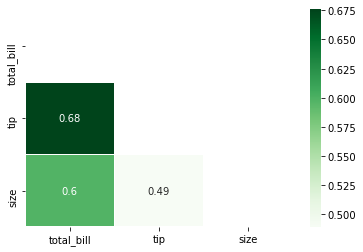

In [6]:
explore.heat_corr(tips_df)

In [7]:
model = ols('tip ~ total_bill', data=tips_df).fit()
tips_df['yhat'] = model.predict(tips_df.total_bill)

In [8]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


In [9]:
tips_df['yhat_baseline'] = tips_df['tip'].mean()

In [10]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279


In [11]:
tips_df['res'] = tips_df['yhat'] - tips_df['tip']

In [12]:
tips_df['base_res'] = tips_df['yhat_baseline'] - tips_df['tip']

In [13]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,res,base_res
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,-0.107178,-0.611721
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279,-1.950869,-2.921721
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279,1.774836,0.998279
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279,1.301175,0.998279
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279,1.041807,1.248279


Text(0.5, 1.0, 'Actual vs Baseline Residual')

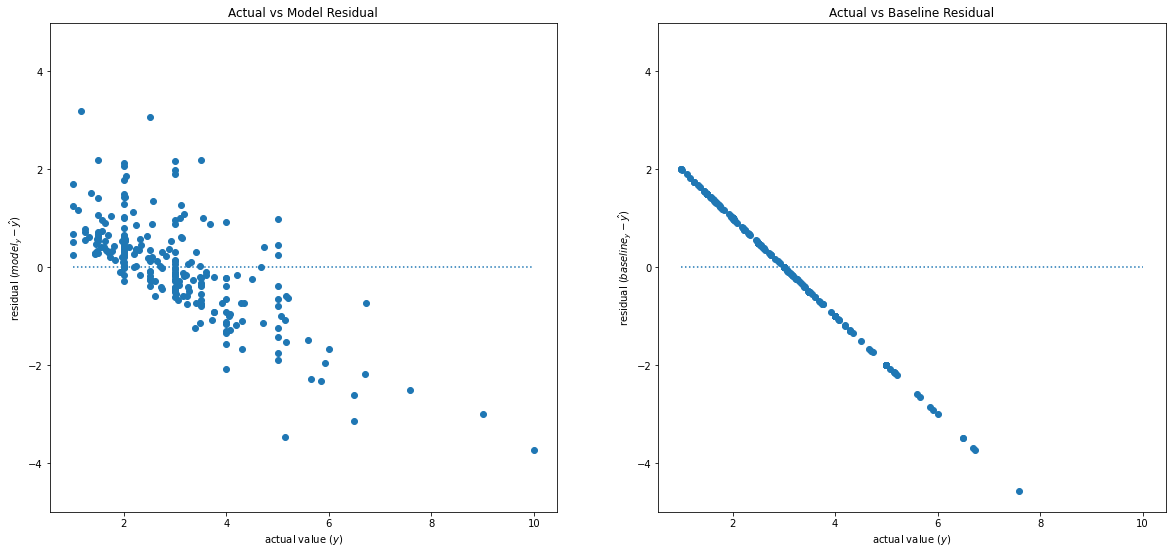

In [14]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hlines(0, tips_df.tip.min(), tips_df.tip.max(), ls=':')
plt.scatter(tips_df.tip, tips_df.res)
plt.ylim(-5,5)
plt.ylabel('residual ($model_y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Model Residual')
plt.subplot(122)
plt.hlines(0, tips_df.tip.min(), tips_df.tip.max(), ls=':')
plt.scatter(tips_df.tip, tips_df.base_res)
plt.ylim(-5,5)
plt.ylabel('residual ($baseline_y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Baseline Residual')

In [15]:
def plot_res(actual, baseline, predicted):
    res = predicted - actual
    base_res = baseline - actual
    plt.figure(figsize=(20,9))
    plt.subplot(121)
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, res)
    plt.ylim(-5,5)
    plt.ylabel('residual ($model_y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Model Residual')
    plt.subplot(122)
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, base_res)
    plt.ylim(-5,5)
    plt.ylabel('residual ($baseline_y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Baseline Residual')
    return plt.gca()

<AxesSubplot:title={'center':'Actual vs Baseline Residual'}, xlabel='actual value ($y$)', ylabel='residual ($baseline_y - \\hat{y}$)'>

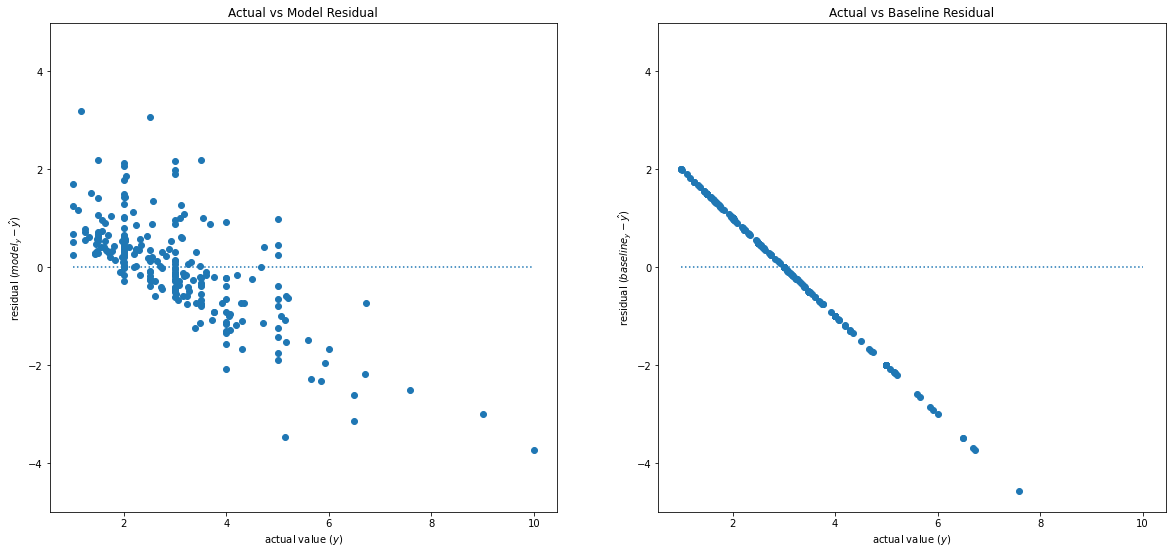

In [16]:
plot_res(tips_df.tip, tips_df.yhat_baseline, tips_df.yhat)

In [30]:
# SSE
sse_res = sum(tips_df.res ** 2)
sse_base = sum(tips_df.base_res ** 2)
sse_res

252.78874385077603

In [18]:
# MSE 
mse_res = sse_res / len(tips_df)
mse_base = sse_base / len(tips_df)

In [19]:
# RMSE
rmse_res = sqrt(mse_res)
rmse_base = sqrt(mse_base)

In [20]:
# ESS
ess_res = sum((tips_df.yhat - tips_df.tip.mean()) ** 2)
ess_base = sum((tips_df.yhat_baseline - tips_df.tip.mean()) ** 2)

In [21]:
# SSE
tss_res = sse_res + ess_res
tss_base = sse_base + ess_base

In [22]:
#r2
r2 = ess_res/tss_res
print('R-squared = ',round(r2,3))

R-squared =  0.457


In [23]:
sse_res > sse_base

False

In [24]:
eval_df = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
base_df = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
eval_df['model_error'] = np.array([sse_res, mse_res, rmse_res])
eval_df['base_error'] = np.array([sse_base, mse_base, rmse_base])
eval_df['model_efficacy'] = eval_df['model_error'] < eval_df['base_error']

In [25]:
eval_df

,metric,model_error,base_error,model_efficacy
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


In [26]:
print(f'r\N{SUPERSCRIPT TWO} = {r2:.2}')

r² = 0.46


<AxesSubplot:title={'center':'Actual vs Baseline Residual'}, xlabel='actual value ($y$)', ylabel='residual ($baseline_y - \\hat{y}$)'>

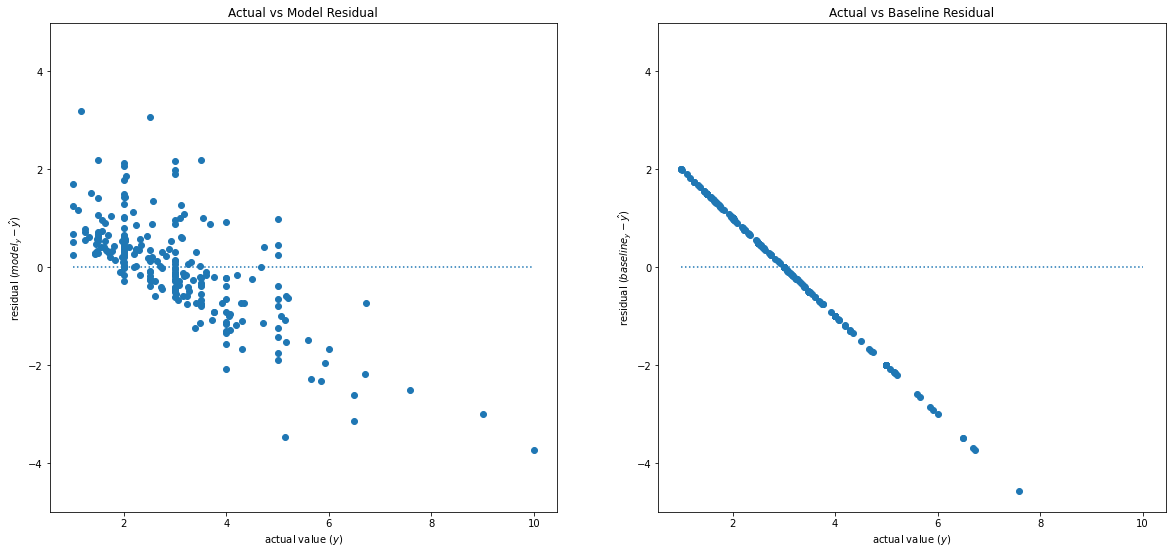

In [27]:
evaluate.plot_res(tips_df.tip, tips_df.yhat_baseline, tips_df.yhat)

In [69]:
slope, intercept, r, p, se = stats.linregress(tips_df.total_bill, tips_df.tip)

0.007364789848762593


In [50]:
def regression_errors(actual, predicted):
    sse_res = sum((actual - predicted)  ** 2)
    ess_res = sum((predicted - actual.mean()) ** 2)
    tss_res = sse_res + ess_res
    mse_res = sse_res / len(actual)
    rmse_res = mse_res ** (1/2)
    return (print(f'|Sum of Squared Errors: {sse_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Explained Sum of Squares: {ess_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Total Sum of Squares : {tss_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Mean Squared Error : {mse_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Root Mean Squared Error : {rmse_res:.4}'))

In [51]:
regression_errors(tips_df.tip, tips_df.yhat) 

|Sum of Squared Errors: 252.8
|-----------------------------------
|Explained Sum of Squares: 212.4
|-----------------------------------
|Total Sum of Squares : 465.2
|-----------------------------------
|Mean Squared Error : 1.036
|-----------------------------------
|Root Mean Squared Error : 1.018


(None, None, None, None, None, None, None, None, None)

In [52]:
actual = tips_df.tip
predicted = tips_df.yhat
sse_res = sum((predicted-actual)  ** 2)
sse_res

252.78874385077603

In [53]:
ess_res = sum((predicted - actual.mean()) ** 2)
ess_res

212.42373319840414

In [54]:
len(actual)

244

In [55]:
len(tips_df)

244

In [56]:
def baseline_mean_erros(actual):
    baseline = actual.mean()
    sse_base = sum((actual - baseline)  ** 2)
    mse_base = sse_base / len(actual)
    rmse_base = mse_base ** (1/2)
    return (print(f'|Sum of Squared Errors: {sse_base:.4}'),
            print('|-----------------------------------'),
            print(f'|Mean Squared Error : {mse_base:.4}'),
            print('|-----------------------------------'),
            print(f'|Root Mean Squared Error : {rmse_base:.4}'))

In [57]:
baseline_mean_erros(tips_df.tip)

|Sum of Squared Errors: 465.2
|-----------------------------------
|Mean Squared Error : 1.907
|-----------------------------------
|Root Mean Squared Error : 1.381


(None, None, None, None, None)

In [59]:
def better_than_baseline(actual, predicted):
    sse_res = sum((actual - predicted)  ** 2)
    ess_res = sum((predicted - actual.mean()) ** 2)
    tss_res = sse_res + ess_res
    mse_res = sse_res / len(actual)
    rmse_res = mse_res ** (1/2)
    baseline = actual.mean()
    sse_base = sum((actual - baseline)  ** 2)
    mse_base = sse_base / len(actual)
    rmse_base = mse_base ** (1/2)
    eval_df = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
    base_df = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
    eval_df['model_error'] = np.array([sse_res, mse_res, rmse_res])
    eval_df['base_error'] = np.array([sse_base, mse_base, rmse_base])
    eval_df['model_efficacy'] = eval_df['model_error'] < eval_df['base_error']
    return eval_df

In [60]:
better_than_baseline(tips_df.tip, tips_df.yhat)

,metric,model_error,base_error,model_efficacy
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


In [74]:
def regression_stats(x, y):
    slope, intercept, r, p, se = stats.linregress(x, y)
    return(print(f'|Slope of Regression: {slope:.4}'),
            print('|-----------------------------------'),
            print(f'|Regression intercept: {intercept:.4}'),
            print('|-----------------------------------'),
            print(f'|r\N{SUPERSCRIPT TWO} = {r2:.2}'),
            print('|-----------------------------------'),
            print(f'|p value = {p:.4}'),
            print('|-----------------------------------'),
            print(f'|Standard error : {se:.4}'))

In [75]:
regression_stats(tips_df.tip, tips_df.yhat)

|Slope of Regression: 0.4566
|-----------------------------------
|Regression intercept: 1.629
|-----------------------------------
|r² = 0.46
|-----------------------------------
|p value = 6.692e-34
|-----------------------------------
|Standard error : 0.03202


(None, None, None, None, None, None, None, None, None)